<a href="https://colab.research.google.com/github/rsudiplive/EDA_CapstoneProjects/blob/main/Sudip_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import mean

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_hotel= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dat/Hotel Bookings.csv')

In [ ]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df_hotel.describe() #understanding the overall summary statistics for all the numerical columns! 

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df_hotel.shape

(119390, 32)


This Dataset contains a total of 119386 rows with 25 variant features(not all variables are important to us) we'll restrict to only those columns which are important to us in our analysis. <br>

Each row represent a particular booking made by a guest in a particular hotel.There are two hotel's Resort and City Hotel where all the bookings are made.

Let's proceed step by step:




##**Variables Identification & Data Exploration**

In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#unique hotels, categorical
df_hotel['hotel'].unique() 

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df_hotel['is_canceled'].unique() #attribute/Dichotomous, 0-> False(booking not cancelled) & 1-> True(is cancelled)

array([0, 1])

In [ ]:
df_hotel['arrival_date_year'].unique() #three years

array([2015, 2016, 2017])

In [ ]:
df_hotel['arrival_date_month'].unique() #all months present

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
df_hotel.meal.unique() #not a clear understanding(also not important)

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df_hotel.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
df_hotel.distribution_channel.value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
df_hotel.is_repeated_guest.value_counts() 
#1->> indicates the booking has been done made by same guests
#0->> indicates the booking has been made by unique guests(different)

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [ ]:
df_hotel.customer_type.unique() #customer types

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
df_hotel.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [ ]:
df_hotel.adr= df_hotel.adr.astype('int64') #converting the adr type from float to int

In [ ]:
df_hotel.adr.describe()

count    119390.000000
mean        101.626761
std          50.523114
min          -6.000000
25%          69.000000
50%          94.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Looks there is negetive values for adr which can't be possible for a price/night of a hotel. Possibly can be outlier values present. Obviously We'll remove those.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


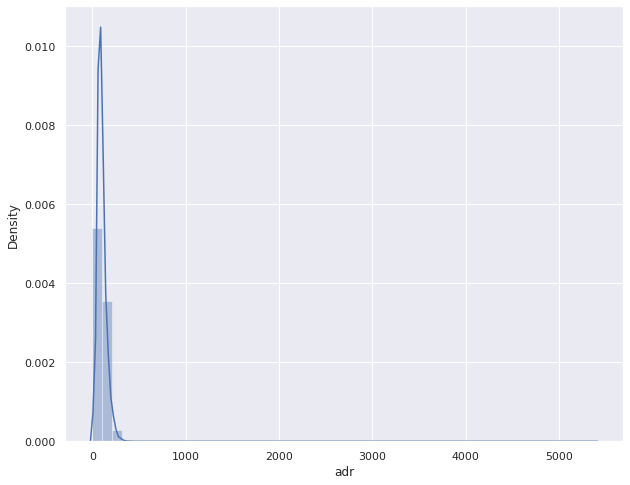

In [ ]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.distplot(df_hotel.adr) #distribution for adr


The distribution tells it has positive skew. <br>
Also the distribution doesn't deviate much from normal distribution.

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_hotel['adr'].skew())
print("Kurtosis: %f" % df_hotel['adr'].kurt())

Skewness: 10.540908
Kurtosis: 1014.366011


High value of Skewness and Kurtosis shows there's large amount of outliers on adr value.

**Let's have a look at the heatmap for understanding the dependencies within each variables**

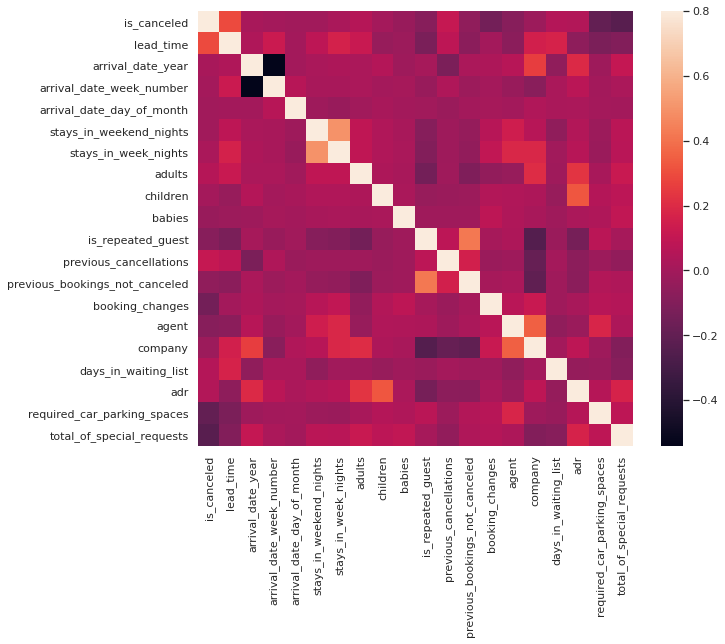

In [ ]:
#correlation matrix
corrmat = df_hotel.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Looking at the heatmap, at first sight we can tell is_cancelled and lead_time shows positive correlation. Also, stay_in_week_nights & stay_in_weekend_nights are positively correlated with each other. previous_bookings_not_cancelled and is_repeated_guest shows correlation between each other. Agent & company are same understandings(Although these numerical variables have not much significance in our analysis) <br>

Also the type of guests wheather an adult or a child has some correlation with adr(price). Well, we'll look into all those.

# Data Pre-processing:

In [ ]:
#Trying to convert the arrival_date_month with months in strings to its corresponding numeric representations for months, to make it available in the datetime column
map_dic = {'January': 1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

def convertmonth(col):
  if col in map_dic.keys():
    value = map_dic[col]

  return value

In [ ]:
df_hotel.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01


In [ ]:
df_hotel['Month'] = df_hotel.apply(lambda x: convertmonth(x['arrival_date_month']),axis=1)

In [ ]:
#best time for a hotel booking depends on month and year mostly
#converting the year and month to datetime obj

df_hotel['Date_of_arrival'] = pd.to_datetime(df_hotel[['arrival_date_year','Month','arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))

In [ ]:
df_hotel.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Month,Date_of_arrival
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01,7,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01,7,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02,7,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02,7,2015-07-01


In [ ]:
#adding a column with year-month format

df_hotel['Year_Month']= df_hotel['Date_of_arrival'].apply(lambda x: x.strftime("%Y-%m-%d")[:7])

In [ ]:
df_hotel.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Month,Date_of_arrival,Year_Month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01,7,2015-07-01,2015-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01,7,2015-07-01,2015-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02,7,2015-07-01,2015-07


***Let's do some labelling with the columns: is_canceled & is_repeated_guest***

In [ ]:
#let's label the column values for is_canceled:
def label_cancel(col):
  map_cancel={0:'Not_cancelled',1:'Cancelled'}
  if col in map_cancel.keys():
    value=map_cancel[col]
  return value

In [ ]:
label_cancel(0)

'Not_cancelled'

In [ ]:
#let's label the column values for is_repeated_guest as well:
def label_repeat(col1):
  map_repeated={0:'Guest_not_repeated',1:'Repeated_Guests'}
  if col1 in map_repeated.keys():
    value1=map_repeated[col1]
  return value1

In [ ]:
df_hotel['is_canceled'] = df_hotel['is_canceled'].apply(lambda x: label_cancel(x))
df_hotel['is_repeated_guest'] = df_hotel['is_repeated_guest'].apply(lambda x: label_repeat(x))

In [ ]:
df_hotel.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Month,Date_of_arrival,Year_Month
0,Resort Hotel,Not_cancelled,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,Guest_not_repeated,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01,7,2015-07-01,2015-07
1,Resort Hotel,Not_cancelled,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,Guest_not_repeated,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01,7,2015-07-01,2015-07
2,Resort Hotel,Not_cancelled,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,Guest_not_repeated,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02,7,2015-07-01,2015-07


**Data Cleaning: Missing Values and Outliers**

In [ ]:
#we're good to remove the extra arrival_date_day_of_month & arrival_date_year since we've already maintained those in seperate datetime fields
#also we can drop company(many null values and also not required for analysis),agent(there's not much significance) columns as well.

df_hotel.drop(columns=['arrival_date_day_of_month','arrival_date_year','company','agent'],inplace= True)

In [ ]:
#Also we can remove the numerical month since we already have a year-month format
df_hotel.drop(columns=['Month'],inplace=True)

In [ ]:
#we can fill with 0 childrens for missing values in children column since it contain only 4null values
df_hotel['children'].fillna(0,inplace=True)

In [ ]:
df_hotel.children.isnull().any()

False

In [ ]:
#we can remove the rows with adults, children, babies whose values are 0, as there won't be any booking that exists without any guest. 
df_hotel.drop(df_hotel[(df_hotel['adults']+df_hotel['children']+df_hotel['babies'])==0].index,inplace=True)

In [ ]:
#also the children column is of float type, we can convert to int
df_hotel['children']=df_hotel['children'].astype('int')

In [ ]:
df_hotel.head(3) #checking the head of the modified df 

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date_of_arrival,Year_Month
0,Resort Hotel,Not_cancelled,342,July,27,0,0,2,0,0,BB,PRT,Direct,Direct,Guest_not_repeated,0,0,C,C,3,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01,2015-07-01,2015-07
1,Resort Hotel,Not_cancelled,737,July,27,0,0,2,0,0,BB,PRT,Direct,Direct,Guest_not_repeated,0,0,C,C,4,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01,2015-07-01,2015-07
2,Resort Hotel,Not_cancelled,7,July,27,0,1,1,0,0,BB,GBR,Direct,Direct,Guest_not_repeated,0,0,A,C,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-07-02,2015-07-01,2015-07


In [ ]:
df_hotel.describe()

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,104.109227,27.163376,0.927053,2.499195,1.859206,0.104043,0.007961,0.087191,0.137094,0.218799,2.321215,101.764542,0.062553,0.571504
std,106.875450,13.601107,0.995117,1.897106,0.575186,0.398836,0.097509,0.844918,1.498137,0.638504,17.598002,50.421738,0.245360,0.792876
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000
25%,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000
50%,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,0.000000
75%,161.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000


Let's try to remove the outliers in ADR(price/night) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


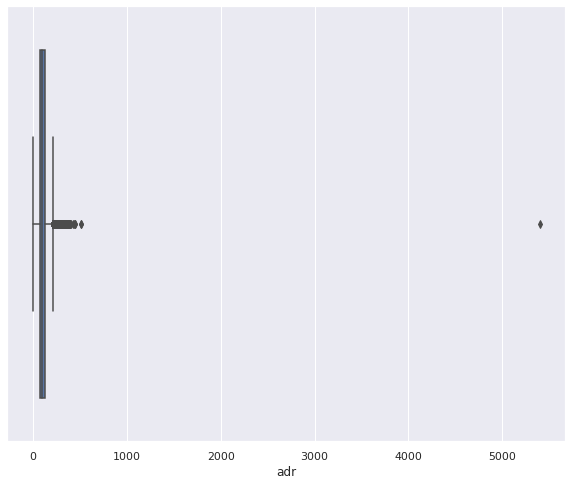

In [ ]:
sns.boxplot(df_hotel['adr'])

In [ ]:
#using percentiles:
min_threshold,max_threshold= df_hotel.adr.quantile([0.01,0.999])
min_threshold,max_threshold

(0.0, 326.0)

In [ ]:
df_hotel[df_hotel.adr<min_threshold] #looking at adr values less than the min threshold

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date_of_arrival,Year_Month
14969,Resort Hotel,Not_cancelled,195,March,10,4,6,2,0,0,BB,GBR,Groups,Direct,Repeated_Guests,0,2,A,H,2,No Deposit,0,Transient-Party,-6,0,0,Check-Out,2017-03-15,2017-03-05,2017-03


In [ ]:
df_hotel[df_hotel.adr>max_threshold] #similarly looking at the extreme values of adr

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date_of_arrival,Year_Month
3712,Resort Hotel,Not_cancelled,52,December,53,0,1,2,0,0,HB,PRT,Direct,Direct,Guest_not_repeated,0,0,E,F,1,No Deposit,0,Transient,332,1,1,Check-Out,2016-01-01,2015-12-31,2015-12
7419,Resort Hotel,Cancelled,13,August,33,1,3,3,1,0,HB,ESP,Online TA,TA/TO,Guest_not_repeated,0,0,H,H,0,No Deposit,0,Transient,369,0,0,Canceled,2016-07-27,2016-08-08,2016-08
7676,Resort Hotel,Cancelled,140,August,34,2,2,3,1,0,HB,FRA,Online TA,TA/TO,Guest_not_repeated,0,0,H,H,1,No Deposit,0,Transient,329,0,0,Canceled,2016-07-12,2016-08-20,2016-08
9727,Resort Hotel,Cancelled,31,December,53,0,2,2,0,0,Undefined,PRT,Groups,Direct,Guest_not_repeated,0,0,E,E,0,No Deposit,0,Transient-Party,340,0,1,Canceled,2016-12-30,2016-12-30,2016-12
9728,Resort Hotel,Cancelled,95,December,53,0,2,2,2,0,BB,PRT,Online TA,TA/TO,Guest_not_repeated,0,0,G,G,0,No Deposit,0,Transient,384,0,0,Canceled,2016-09-26,2016-12-30,2016-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112700,City Hotel,Not_cancelled,35,May,21,0,3,3,2,0,BB,CHE,Direct,Direct,Guest_not_repeated,0,0,G,G,1,No Deposit,0,Transient,335,0,0,Check-Out,2017-05-28,2017-05-25,2017-05
112707,City Hotel,Not_cancelled,14,May,21,0,3,3,0,0,BB,ECU,Direct,Direct,Guest_not_repeated,0,0,G,G,0,No Deposit,0,Transient,335,0,0,Check-Out,2017-05-28,2017-05-25,2017-05
114535,City Hotel,Not_cancelled,2,June,25,0,3,2,0,0,BB,NLD,Direct,Direct,Guest_not_repeated,0,0,G,G,0,No Deposit,0,Transient,333,0,0,Check-Out,2017-06-23,2017-06-20,2017-06
115541,City Hotel,Not_cancelled,24,July,27,2,3,2,3,0,HB,ROU,Direct,Direct,Guest_not_repeated,0,0,G,G,1,No Deposit,0,Transient,338,0,0,Check-Out,2017-07-07,2017-07-02,2017-07


In [ ]:
df_hotel_adr_new=df_hotel[(df_hotel.adr>min_threshold) & (df_hotel.adr<max_threshold)]
df_hotel_adr_new.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date_of_arrival,Year_Month
2,Resort Hotel,Not_cancelled,7,July,27,0,1,1,0,0,BB,GBR,Direct,Direct,Guest_not_repeated,0,0,A,C,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-07-02,2015-07-01,2015-07
3,Resort Hotel,Not_cancelled,13,July,27,0,1,1,0,0,BB,GBR,Corporate,Corporate,Guest_not_repeated,0,0,A,A,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-07-02,2015-07-01,2015-07
4,Resort Hotel,Not_cancelled,14,July,27,0,2,2,0,0,BB,GBR,Online TA,TA/TO,Guest_not_repeated,0,0,A,A,0,No Deposit,0,Transient,98,0,1,Check-Out,2015-07-03,2015-07-01,2015-07
5,Resort Hotel,Not_cancelled,14,July,27,0,2,2,0,0,BB,GBR,Online TA,TA/TO,Guest_not_repeated,0,0,A,A,0,No Deposit,0,Transient,98,0,1,Check-Out,2015-07-03,2015-07-01,2015-07
6,Resort Hotel,Not_cancelled,0,July,27,0,2,2,0,0,BB,PRT,Direct,Direct,Guest_not_repeated,0,0,C,C,0,No Deposit,0,Transient,107,0,0,Check-Out,2015-07-03,2015-07-01,2015-07


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


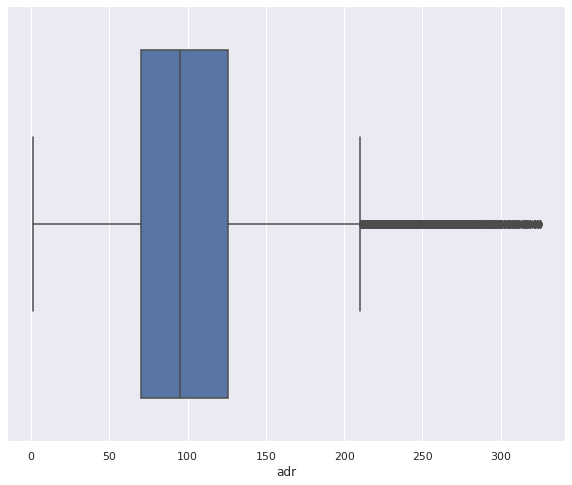

In [ ]:
sns.boxplot(df_hotel_adr_new['adr'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


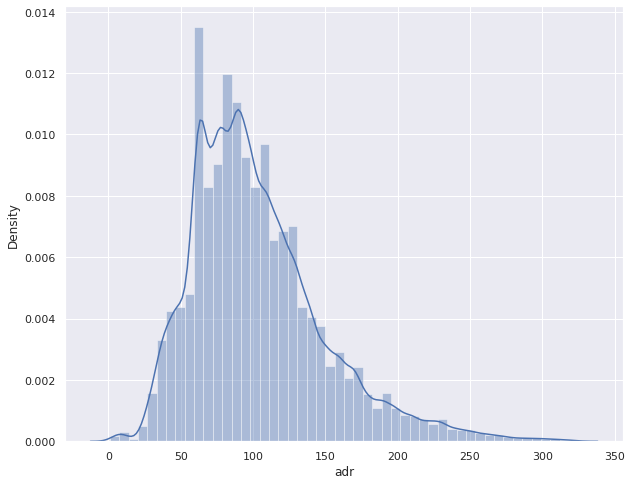

In [ ]:
sns.distplot(df_hotel_adr_new['adr'])

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_hotel_adr_new['adr'].skew())
print("Kurtosis: %f" % df_hotel_adr_new['adr'].kurt())

Skewness: 1.096469
Kurtosis: 1.671737


We can see the distribution curve looks good now and the outliers are removed using this percentile approach.

# **Let's find out the hotel with most no of Bookings(which are not cancelled)**

In [ ]:
df_hotel_not_cancelled= df_hotel[df_hotel['is_canceled']=='Not_cancelled']
df_hotel_cancelled= df_hotel[df_hotel['is_canceled']=='Cancelled']

In [ ]:
df_hotel_not_cancelled

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date_of_arrival,Year_Month
0,Resort Hotel,Not_cancelled,342,July,27,0,0,2,0,0,BB,PRT,Direct,Direct,Guest_not_repeated,0,0,C,C,3,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01,2015-07-01,2015-07
1,Resort Hotel,Not_cancelled,737,July,27,0,0,2,0,0,BB,PRT,Direct,Direct,Guest_not_repeated,0,0,C,C,4,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01,2015-07-01,2015-07
2,Resort Hotel,Not_cancelled,7,July,27,0,1,1,0,0,BB,GBR,Direct,Direct,Guest_not_repeated,0,0,A,C,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-07-02,2015-07-01,2015-07
3,Resort Hotel,Not_cancelled,13,July,27,0,1,1,0,0,BB,GBR,Corporate,Corporate,Guest_not_repeated,0,0,A,A,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-07-02,2015-07-01,2015-07
4,Resort Hotel,Not_cancelled,14,July,27,0,2,2,0,0,BB,GBR,Online TA,TA/TO,Guest_not_repeated,0,0,A,A,0,No Deposit,0,Transient,98,0,1,Check-Out,2015-07-03,2015-07-01,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,Not_cancelled,23,August,35,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,Guest_not_repeated,0,0,A,A,0,No Deposit,0,Transient,96,0,0,Check-Out,2017-09-06,2017-08-30,2017-08
119386,City Hotel,Not_cancelled,102,August,35,2,5,3,0,0,BB,FRA,Online TA,TA/TO,Guest_not_repeated,0,0,E,E,0,No Deposit,0,Transient,225,0,2,Check-Out,2017-09-07,2017-08-31,2017-08
119387,City Hotel,Not_cancelled,34,August,35,2,5,2,0,0,BB,DEU,Online TA,TA/TO,Guest_not_repeated,0,0,D,D,0,No Deposit,0,Transient,157,0,4,Check-Out,2017-09-07,2017-08-31,2017-08
119388,City Hotel,Not_cancelled,109,August,35,2,5,2,0,0,BB,GBR,Online TA,TA/TO,Guest_not_repeated,0,0,A,A,0,No Deposit,0,Transient,104,0,0,Check-Out,2017-09-07,2017-08-31,2017-08


Text(0, 0.5, 'Total Bookings')

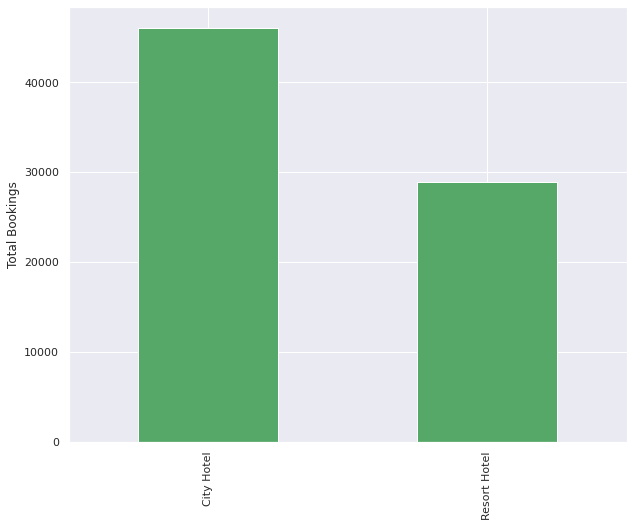

In [ ]:
df_hotel_not_cancelled['hotel'].value_counts().plot(kind='bar',color='g')
# df_hotel.hotel.value_counts().plot(kind='barh')
plt.ylabel('Total Bookings')

**City Hotel has the most no of bookings made with more than 40,000 bookings in all the three years**

## **Nos of bookings that got cancelled/not-cancelled based on each hotel** 

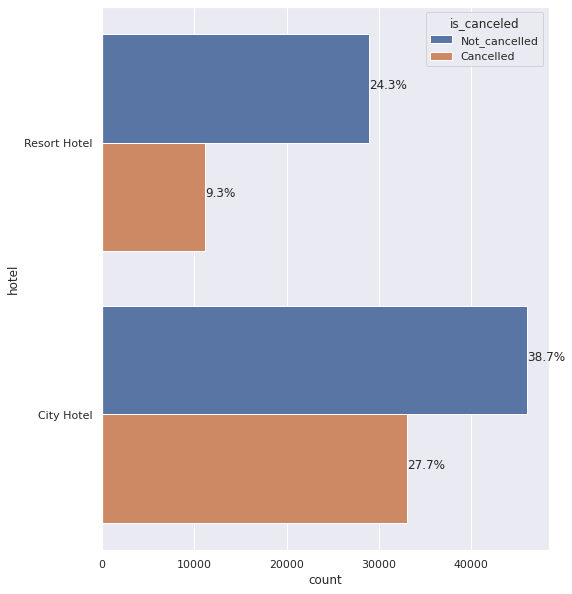

In [ ]:
ax= sns.countplot(data=df_hotel,y='hotel',hue='is_canceled')
sns.set(rc={"figure.figsize": (8, 10)})

total = len(df_hotel['hotel'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

38.7% of the bookings made in City Hotel were without cancellations, while 24.3% of the bookings didn't get cancelled in Resort. <br>

Around 27.7% of the bookings made in City Hotel got cancelled while Resort hotel had 9.3% of the bookings made in resort Hotel suffered cancellations.

In [ ]:
#subsetting each booking data with bookings made in each years!
booking_2015_subset_df = df_hotel_not_cancelled[(df_hotel_not_cancelled['Date_of_arrival'].dt.year == 2015)]
booking_2016_subset_df = df_hotel_not_cancelled[(df_hotel_not_cancelled['Date_of_arrival'].dt.year == 2016)]
booking_2017_subset_df = df_hotel_not_cancelled[(df_hotel_not_cancelled['Date_of_arrival'].dt.year == 2017)]

# **Lets observe the pattern of sucessfull bookings made each year for each hotels:** <br>

For 2015-->>

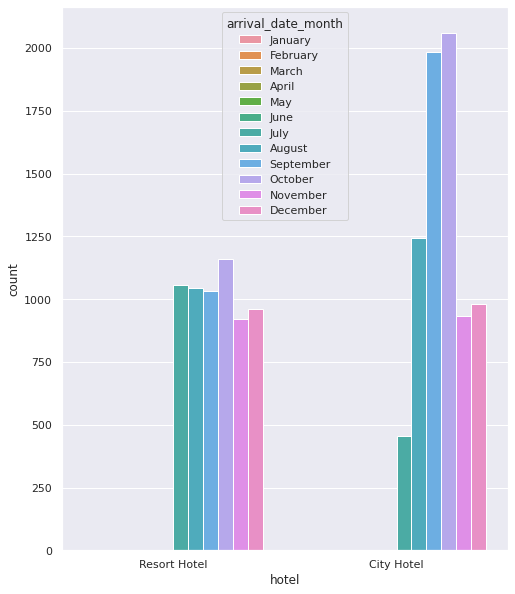

In [ ]:
sns.countplot(data=booking_2015_subset_df,x='hotel',hue='arrival_date_month')

In 2015 for **Resort Hotel**, we can see most guests made sucessfull bookings in the month of **October**. followed by **July**. <br>

In 2015 for **City hotel** most succesfull bookings were made in the month of **October** followed by **September**.



For 2016-->>

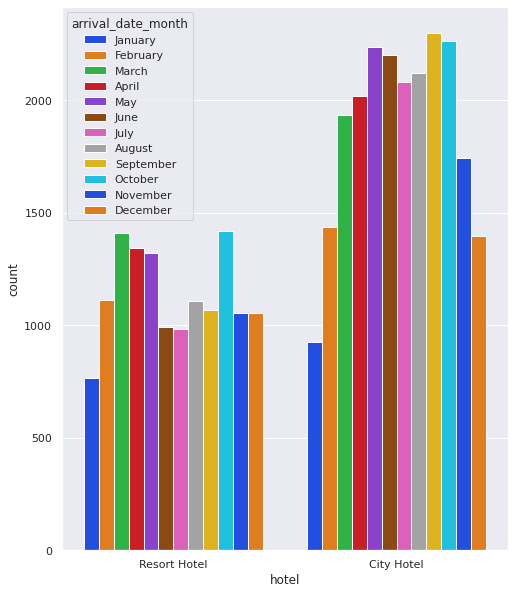

In [ ]:
#For 2016:
sns.countplot(data=booking_2016_subset_df,x='hotel',hue='arrival_date_month',palette='bright')

In 2016 for **Resort Hotel**, we can see most guests made sucessfull bookings in the month of **March** followed by **October**. <br>

In 2016 for **City hotel** most succesfull bookings were made in the month of **September** followed by **October**.



For 2017-->>

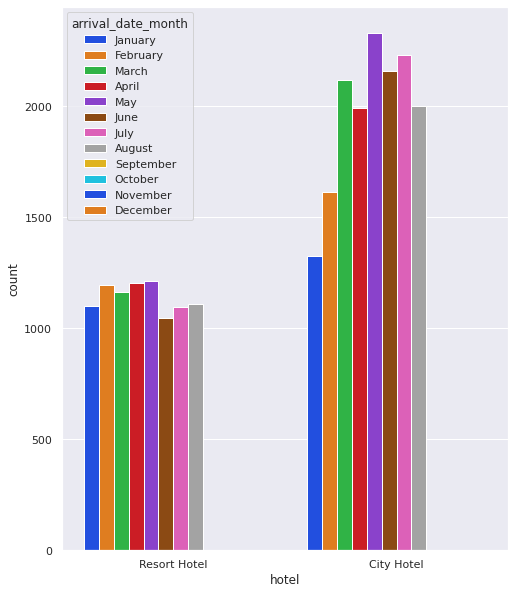

In [ ]:
#For 2017:
sns.countplot(data=booking_2017_subset_df,x='hotel',hue='arrival_date_month',palette='bright')

In 2017 for **Resort Hotel**, we can see most guests made sucessfull bookings in the month of **May** followed by **February** & **April**. <br>

In 2017 for **City hotel** most succesfull bookings were made in the month of **May** followed by **July**.



# Let's have a clear picture

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


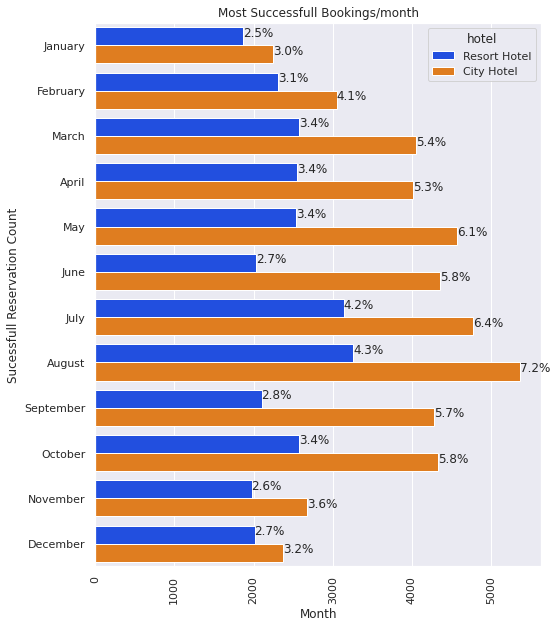

In [ ]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_hotel_not_cancelled['arrival_date_month'] = pd.Categorical(df_hotel_not_cancelled['arrival_date_month'], categories=ordered_months, ordered=True)

ax= sns.countplot(y='arrival_date_month',hue='hotel',data = df_hotel_not_cancelled,palette= 'bright')

total = len(df_hotel_not_cancelled['arrival_date_month'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Most Successfull Bookings/month')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Sucessfull Reservation Count')

plt.show()

**City hotel** followed by **Resort Hotel** made the most successfull bookings in **July** and **August**. <br>

In **July**, City Hotel had an increase of bookings to 6.4% while Resort Hotel had an increase of bookings to 4.2% in the same month.<br>

In **August**, City Hotel had an increase of bookings to 7.2% while Resort Hotel had an increase of bookings to 4.3% in the same month. 

# Plotting bar graphs for number of bookings in each year

In [ ]:
monthly_bookings_vol_2015 = booking_2015_subset_df["Year_Month"].value_counts()
monthly_bookings_vol_2015.sort_index(inplace = True)

**Bookings in 2015:**

Text(0, 0.5, 'Number of bookings')

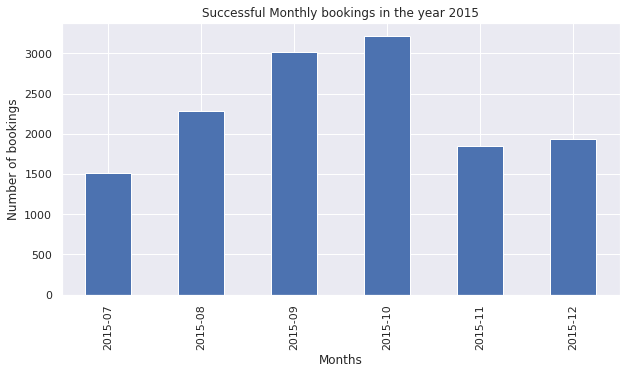

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
monthly_bookings_vol_2015.plot(kind = 'bar')
plt.title("Successful Monthly bookings in the year 2015")
plt.xlabel("Months")
plt.ylabel("Number of bookings")

**October** showed the highest successful bookings in the year **2015** with more than 3000 bookings on average!

**Bookings in 2016:**

In [ ]:
monthly_bookings_vol_2016 = booking_2016_subset_df["Year_Month"].value_counts()
monthly_bookings_vol_2016.sort_index(inplace = True)

Text(0, 0.5, 'Number of bookings')

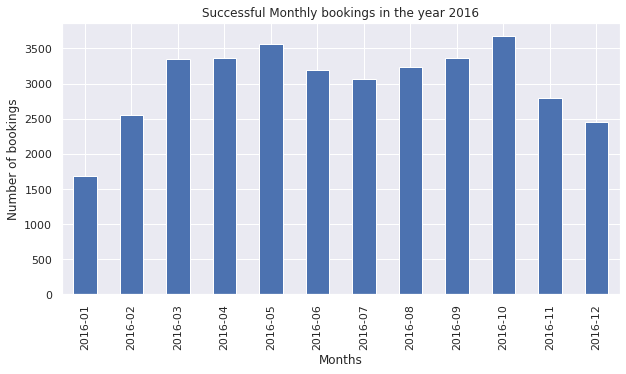

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
monthly_bookings_vol_2016.plot(kind = 'bar')
plt.title("Successful Monthly bookings in the year 2016")
plt.xlabel("Months")
plt.ylabel("Number of bookings")

In **2016**, **October** again came out with the highest successful bookings with more 3500 bookings on an average! 

**Bookings in 2017:**

In [ ]:
monthly_bookings_vol_2017 = booking_2017_subset_df["Year_Month"].value_counts()
monthly_bookings_vol_2017.sort_index(inplace = True)

Text(0, 0.5, 'Number of bookings')

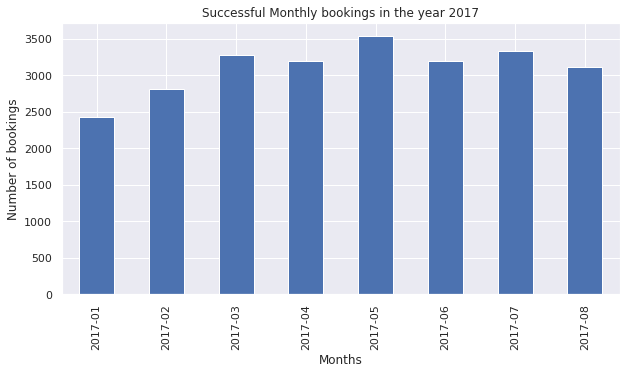

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
monthly_bookings_vol_2017.plot(kind = 'bar')
plt.title("Successful Monthly bookings in the year 2017")
plt.xlabel("Months")
plt.ylabel("Number of bookings")

In **2017**, **May** came out having the most successful bookings with 3500 bookings! 

Text(0.5, 1.0, 'Percentage of Bookings throughout all years for both Hotels')

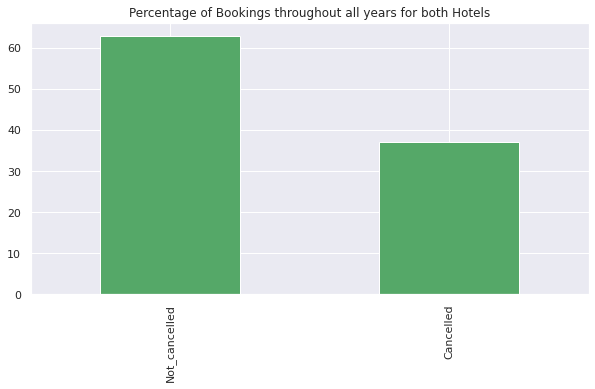

In [ ]:
#Nothing much, just the percentage of total successfull and unsuccessful bookings for all years.
percent_bookings = df_hotel['is_canceled'].value_counts()/df_hotel['is_canceled'].value_counts().sum()*100
percent_bookings.plot(kind='bar',color='g')
plt.title('Percentage of Bookings throughout all years for both Hotels')

Around 62% of the bookings made in both the hotels were successful, while around 37% of the bookings suffered cancellations on the bookings made.

# **Nature of Stays in both Hotels in Weekend and Weekdays & total nights stayed!**

## Resort Hotel:

**During Weekdays?**

Text(0.5, 0, 'minimum_weekdays_nights')

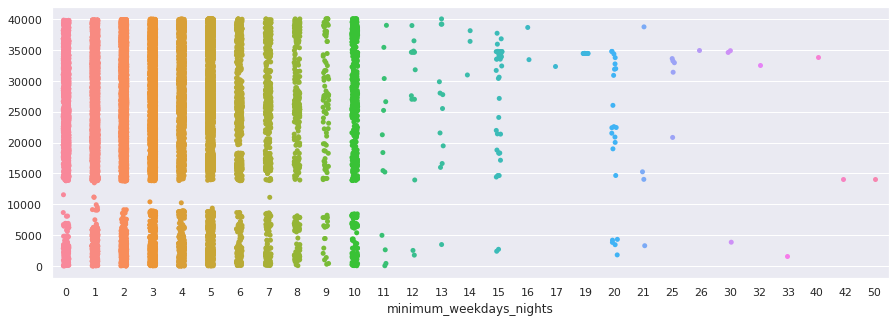

In [ ]:
week_stay_df= df_hotel_not_cancelled[df_hotel_not_cancelled['hotel']=='Resort Hotel']['stays_in_week_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.stripplot(y= week_stay_df.index,x= week_stay_df.values)
plt.xlabel("minimum_weekdays_nights")

Almost 90% of the total guests stayed for around 0-10 nights on an average during Weekdays in a sucessful hotel booking. Might be cases where there's contract type deposit having corporate bookings. 

**During Weekend?**

Text(0.5, 0, 'minimum_weekend_nights')

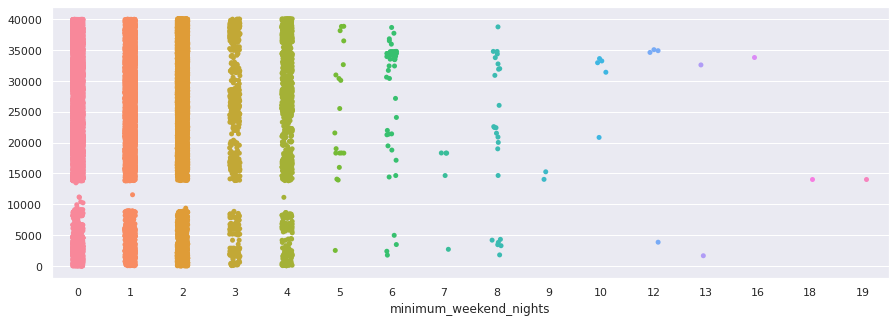

In [ ]:
weekend_stay_df= df_hotel_not_cancelled[df_hotel_not_cancelled['hotel']=='Resort Hotel']['stays_in_weekend_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.stripplot(y= weekend_stay_df.index,x= weekend_stay_df.values)
plt.xlabel("minimum_weekend_nights")

During Weekends, Most people(90%) stay for around 0-4 days on an average at max.


**Total nights stayed:**

## City Hotel:

**During Weekdays?**

Text(0.5, 0, 'minimum_week_nights')

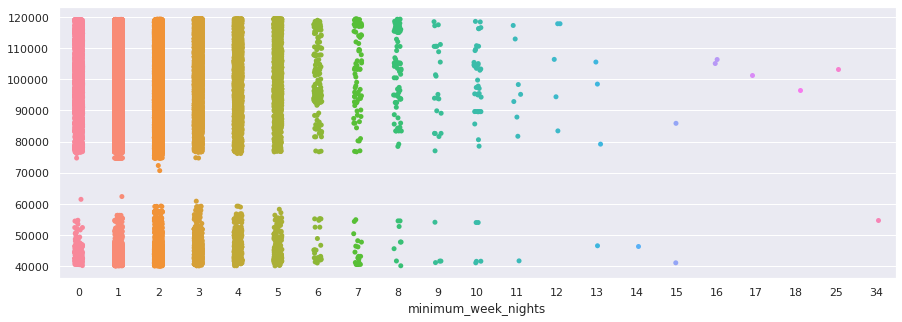

In [ ]:
week_stay_df= df_hotel_not_cancelled[df_hotel_not_cancelled['hotel']=='City Hotel']['stays_in_week_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.stripplot(y= week_stay_df.index,x= week_stay_df.values)
plt.xlabel("minimum_week_nights")

90% of the guest stay for around 0-5 nights on an average during weekdays and sometimes they stretch to around 8 nights(very few guests) at City Hotel.

**During Weekends?**

Text(0.5, 0, 'minimum_weekend_nights')

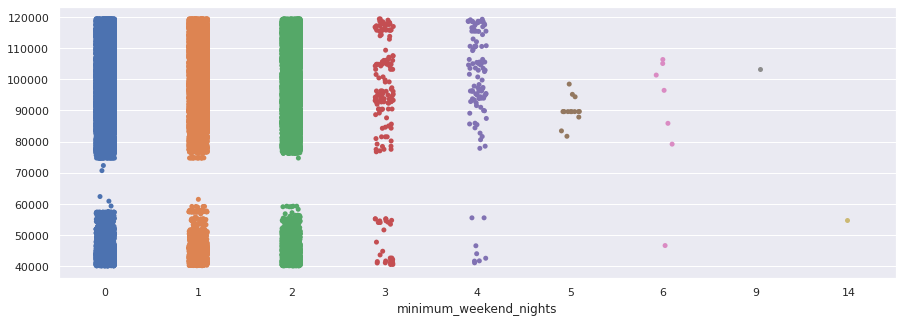

In [ ]:
weekend_stay_df= df_hotel_not_cancelled[df_hotel_not_cancelled['hotel']=='City Hotel']['stays_in_weekend_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.stripplot(y= weekend_stay_df.index,x= weekend_stay_df.values)
plt.xlabel("minimum_weekend_nights")

Most of the people stayed for around 0-2 nights during weekends on an average at City Hotel. 

*Total no of guests that stayed in each hotel:*

In [ ]:
df_hotel_not_cancelled.groupby('hotel').agg({'adults':sum,'children':sum,'babies':sum})

,adults,children,babies
hotel,,,
City Hotel,84510,4618,328
Resort Hotel,53024,3075,452


# Also total stays by each customer types:

In [ ]:
#total stays(including weekdays & weekends)
df_hotel_not_cancelled['total_stays']= df_hotel_not_cancelled['stays_in_week_nights'] + df_hotel_not_cancelled['stays_in_weekend_nights']
df_hotel_not_cancelled.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date_of_arrival,Year_Month,total_stays
0,Resort Hotel,Not_cancelled,342,July,27,0,0,2,0,0,BB,PRT,Direct,Direct,Guest_not_repeated,0,0,C,C,3,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01,2015-07-01,2015-07,0
1,Resort Hotel,Not_cancelled,737,July,27,0,0,2,0,0,BB,PRT,Direct,Direct,Guest_not_repeated,0,0,C,C,4,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01,2015-07-01,2015-07,0
2,Resort Hotel,Not_cancelled,7,July,27,0,1,1,0,0,BB,GBR,Direct,Direct,Guest_not_repeated,0,0,A,C,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-07-02,2015-07-01,2015-07,1


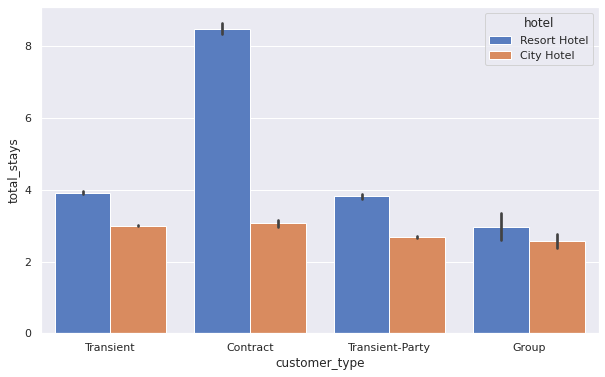

In [ ]:
#total_stays:
f,ax = plt.subplots(figsize=(10,6))
sns.barplot(x = "customer_type", y = "total_stays", data = df_hotel_not_cancelled, hue = "hotel", palette = 'muted')


As we found out earlier from the nature of stays during weekends and weekdays, Guests love to stay at Resort hotel and most of them belonging to Contract customer_type(can be corporate contracts/any contracts made before reservation between the hotel and the customer), stayed for more than 8-nights on an average followed by Transient customer type with around 4-days and they keep relocating from one place to another.


# Bookings made from various market segments?

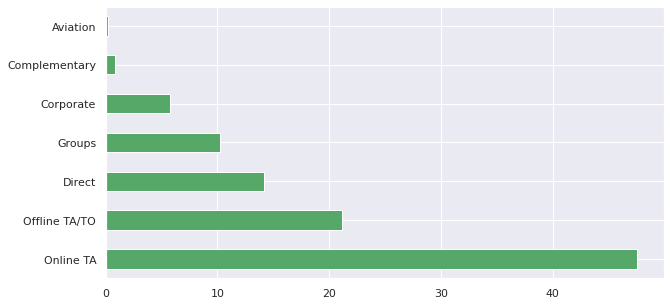

In [ ]:
percent_market_segment=df_hotel_not_cancelled.market_segment.value_counts()/df_hotel_not_cancelled.market_segment.value_counts().sum()*100
percent_market_segment.plot(kind='barh',color='g')

Almost more than 40% of bookings were made from third party Travel agencies, where as around 22% of bookings were made offline by third party agencies. <br>

Around 14% booking was done directly without any third party like any travel agencies.

# Lets understand the nature of similar guests/different guests with respect to a booking if cancelled/not.

There can be situations where a particular booking got cancelled at the last moment after many booking changes. We'll try to figure out here: 

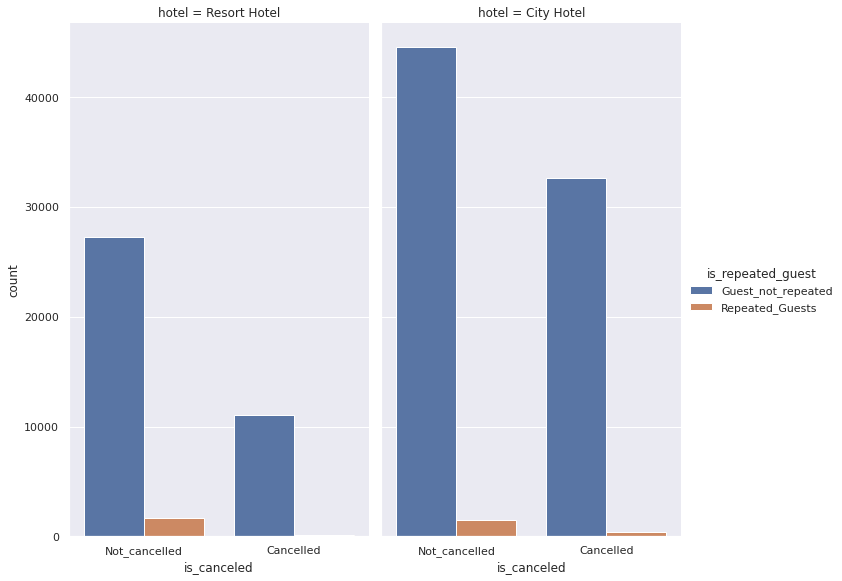

In [ ]:
g = sns.catplot(x="is_canceled", hue="is_repeated_guest", col="hotel",
                data=df_hotel, kind="count",
                height=8, aspect=.6);

In [ ]:
#For City hotel:
percent_repeated_City= df_hotel[df_hotel['hotel']=='City Hotel']['is_repeated_guest'].value_counts()/df_hotel[df_hotel['hotel']=='City Hotel']['is_repeated_guest'].value_counts().sum()*100
percent_repeated_City

Guest_not_repeated    97.502621
Repeated_Guests        2.497379
Name: is_repeated_guest, dtype: float64

In [ ]:
#For Resort hotel:
percent_repeated_Resort= df_hotel[df_hotel['hotel']=='Resort Hotel']['is_repeated_guest'].value_counts()/df_hotel[df_hotel['hotel']=='Resort Hotel']['is_repeated_guest'].value_counts().sum()*100
percent_repeated_Resort

Guest_not_repeated    95.560217
Repeated_Guests        4.439783
Name: is_repeated_guest, dtype: float64

As we are already aware of the fact that City Hotel had more more cancellations on booking than Resort Hotel. Also we can infer that a guest who has not cancelled a booking had made a booking again in the same hotel.

City hotel has around 97.5% of unique(different) guests and nearly 2% of same guests had made their bookings again, where there are guests of around 1% who have made their bookings again on the same hotel even if they've faced cancellations before. Seems like people like this hotel. <br>

In case of Resort hotel, it hosts around 95% of unique(different) guests and about 4% of the guests have made their bookings again, only if they didnot had any previous cancellations on booking.

# Which Hotel sufferred most previous cancellations on bookings

<Figure size 720x576 with 0 Axes>

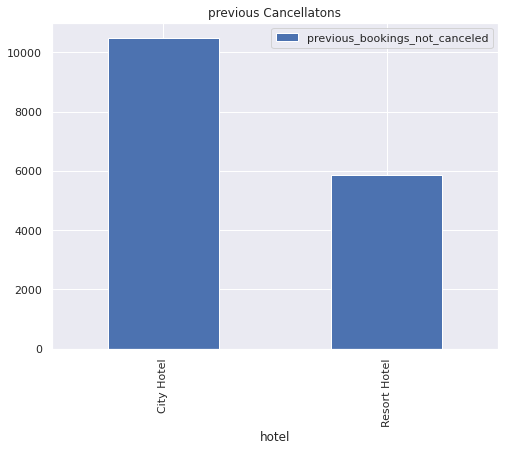

<Figure size 720x576 with 0 Axes>

In [ ]:
plt.rcParams['figure.figsize'] = (8,6)
df_hotel.groupby('hotel').agg({'previous_bookings_not_canceled':sum}).plot(kind='bar')
plt.title('previous Cancellatons')
plt.figure(figsize=(10,8))

City Hotel had more than 10,000 previous cancellations as compared to Resort Hotel which is to around 6000 of total bookings.

## Effect of status of previous bookings on guests  

In [ ]:
prev_book = pd.crosstab(index=df_hotel['hotel'], 
                     columns=df_hotel['is_repeated_guest'], 
                     values=df_hotel['previous_bookings_not_canceled'], 
                     aggfunc='sum', 
                     normalize='index').applymap('{:.2f}'.format)

In [ ]:
prev_book

is_repeated_guest,Guest_not_repeated,Repeated_Guests
hotel,,
City Hotel,0.06,0.94
Resort Hotel,0.35,0.65


In [ ]:
prev_book.columns.name = None
Prev_book_df= prev_book.reset_index()
Prev_book_df=Prev_book_df.loc[:,['Guest_not_repeated','Repeated_Guests']].astype('float')

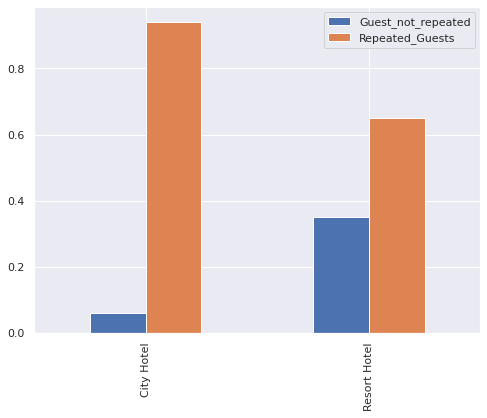

In [ ]:
hotels = ('City Hotel','Resort Hotel')
ax=Prev_book_df[['Guest_not_repeated','Repeated_Guests']].plot(kind='bar')

ax.set_xticklabels(hotels)
plt.show()

Around 94% of the bookings which did'nt had previous cancellations were booked by same guests in City Hotel and 6% of the bookings without previous cancellations had no show.<br> 

While in Resort hotel 65% of the previous bookings which didn't had previous cancellations were booked by same guests. 35% of the bookings without any previous cancellations had no same guests who booked again.

## Let's look at the nature of booking changes on deposit_type by guests on each hotel 

In [ ]:
df_hotel.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

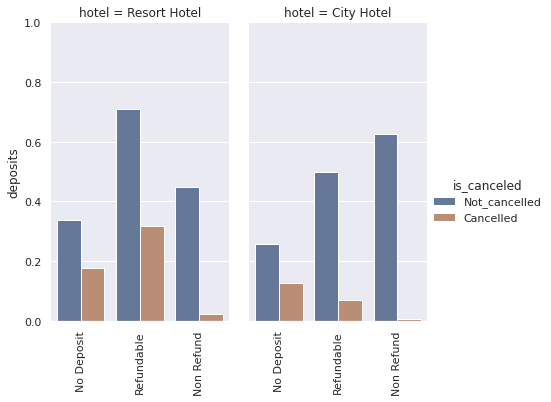

In [ ]:
g = sns.catplot(x="deposit_type", y="booking_changes", col="hotel",
                data=df_hotel, saturation=.5, hue='is_canceled',
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "deposits")
  .set_xticklabels(["No Deposit", "Refundable", "Non Refund"])
  .set(ylim=(0, 1))
  .despine(left=True))
g.set_xticklabels(rotation=90)  

In Resort Hotel, 70% of time with successful booking changes had Refundable policy for guests on deposits and also 30% of time with booking changes which got cancelled, the guests got their amount refunded. One more reason of guests to prefer Resort hotel. 40% of time, with booking changes(that didn't got cancelled) had non-refund policy for deposit.<br>

In City Hotel, 60% of time with successful booking changes had Non-Refundable policy of deposit with having very less cancellations on this booking changes.
50% of time with successful booking changes had refundable policy for guests on deposit and only 10% of the booking changes which got cancelled, the guests got the amount refunded. 

# Let's understand more about the parking spaces with the booking status! 

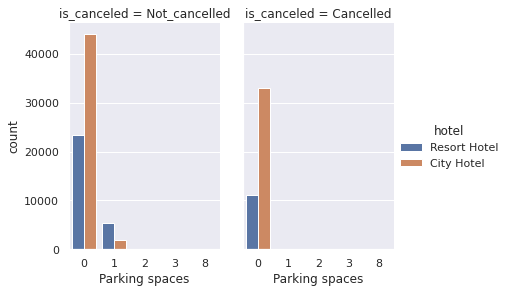

In [ ]:
g = sns.catplot(x="required_car_parking_spaces", hue="hotel", col="is_canceled",
                data=df_hotel, kind="count",
                height=4, aspect=.7)
g.set_xlabels('Parking spaces')

So, most of the guests who opted for parking, the bookings did not get cancelled in both the hotels. Most of the guests opted for 1 parking space in both the hotels on a successful booking made.

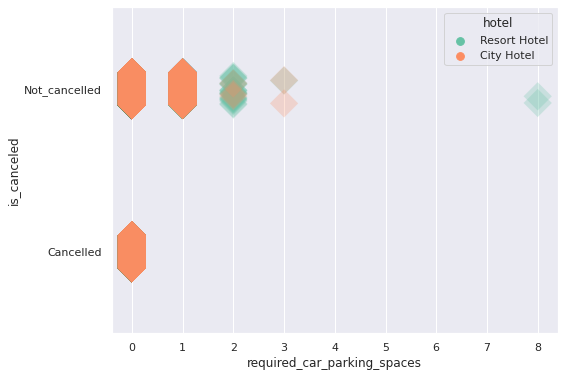

In [ ]:
ax =  sns.stripplot(x="required_car_parking_spaces",y='is_canceled', hue="hotel",
                   data=df_hotel, palette="Set2", size=20, marker="D",
                   edgecolor="gray", alpha=.25)

So, most of the bookings got cancelled in **City Hotel** who did'nt opt for parking. <br>

Guests who opted for parking had no cancellations on booking where most of them opted for 2 parking spaces from both the hotels. Few of them opted for 3 parking space from **City Hotel** while at max 8 parking spaces were opted by a few guest at **Resort Hotel**

#Hotels and their relation with adr/price per night:

##The new price without the outliers: 

In [ ]:
cats = ['January', 'February', 'March', 'April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_hotel_adr_new['month_ordered'] = pd.Categorical(df_hotel_adr_new['arrival_date_month'], ordered=True, categories=cats)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

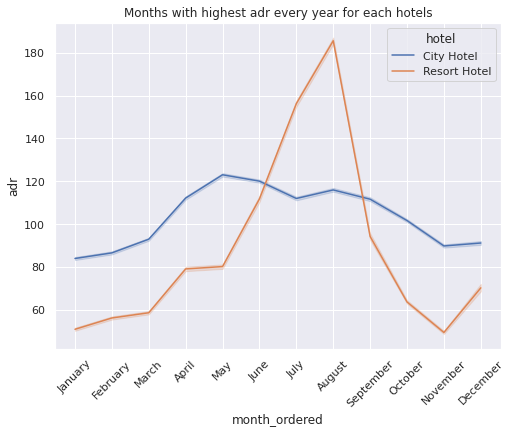

In [ ]:
ax=sns.lineplot(data=df_hotel_adr_new, x="month_ordered", y="adr",hue='hotel',hue_order = ['City Hotel','Resort Hotel'])
ax.set_title('Months with highest adr every year for each hotels')
plt.xticks(rotation=45)

**Resort hotel** had highest adr in the months: **July-August**. <br>

While City Hotel had increase in adr once from April-May and another in months July-August. <br>

Both the hotels had lowest price/night(adr) during starting months(Jan-March) every year. Resort hotel makes good profit during year-end as well(November & December)

# Want to know the effect of special requests on a booking made in a hotel?

In [ ]:
df_hotel.head(3)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date_of_arrival,Year_Month
0,Resort Hotel,Not_cancelled,342,July,27,0,0,2,0,0,BB,PRT,Direct,Direct,Guest_not_repeated,0,0,C,C,3,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01,2015-07-01,2015-07
1,Resort Hotel,Not_cancelled,737,July,27,0,0,2,0,0,BB,PRT,Direct,Direct,Guest_not_repeated,0,0,C,C,4,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01,2015-07-01,2015-07
2,Resort Hotel,Not_cancelled,7,July,27,0,1,1,0,0,BB,GBR,Direct,Direct,Guest_not_repeated,0,0,A,C,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-07-02,2015-07-01,2015-07


In [ ]:
requests_df=df_hotel.groupby(['hotel','is_canceled'])['total_of_special_requests'].value_counts().unstack()
requests_df

total_of_special_requests       0      1     2     3    4   5
hotel        is_canceled                                     
City Hotel   Cancelled      26320   4719  1739   279   21   1
             Not_cancelled  21533  16658  6386  1305  177  25
Resort Hotel Cancelled       7214   2597  1127   166   15   1
             Not_cancelled  15134   9209  3700   744  127  13

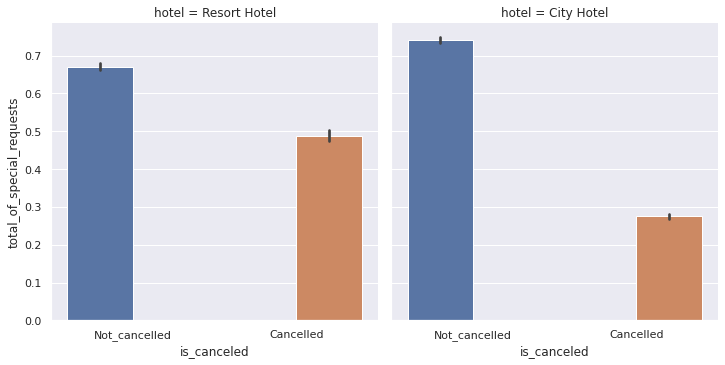

In [ ]:
fg = sns.catplot(x='is_canceled', y='total_of_special_requests', hue='is_canceled', 
                        col='hotel', data=df_hotel, kind='bar')

Text(0.5, 1.0, 'Special Requests received by each hotels with thanks')

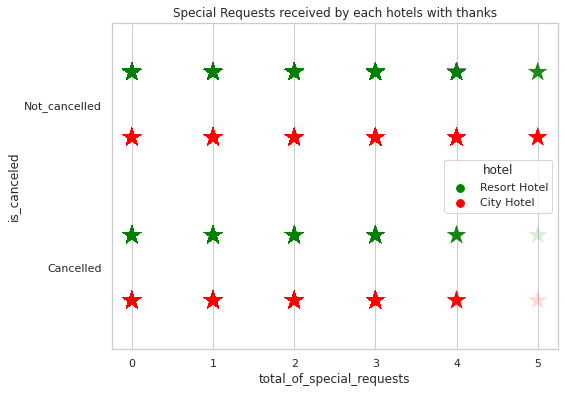

In [ ]:
sns.set(style="whitegrid")

ax =  sns.stripplot(x="total_of_special_requests",y='is_canceled', hue="hotel",
                   data=df_hotel, size=20, marker="*",jitter=False, dodge=True,
                   palette={'Resort Hotel': 'green', 'City Hotel': 'red'}, alpha=.15)
ax.set_title('Special Requests received by each hotels with thanks')

So both the hotels received special requests upto 5, if the bookings were not cancelled. While for cancelled bookings, the hotels get upto 4 special requests. 

In [ ]:
#contributed by Sudip Roy

Thankyou for exploring this Notebook!